In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

/kaggle/input/stockx-data-contest/StockX-Data-Contest-2019-3.csv


# Read Data

In [2]:
df = pd.read_csv("../input/stockx-data-contest/StockX-Data-Contest-2019-3.csv")

In [3]:
def DataFrame_Check(df,n=5):
    print("########### HEAD ###########")
    print(df.head(n))
    print("########### TAIL ###########")
    print(df.tail(n))
    print("########### INFO ###########")
    df.info()
    print("########### DESCRIBE ###########")
    print(df.describe())
    print("########### SHAPE ###########")
    print(df.shape)
    print("########### COLUMNS ###########")
    print(df.columns)
    print("########### NDIM ###########")
    print(df.ndim)

In [4]:
DataFrame_Check(df)

########### HEAD ###########
  Order Date   Brand                                   Sneaker Name  \
0     9/1/17   Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga   
1     9/1/17   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper   
2     9/1/17   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green   
3     9/1/17   Yeezy       Adidas-Yeezy-Boost-350-V2-Core-Black-Red   
4     9/1/17   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   

  Sale Price Retail Price Release Date  Shoe Size  Buyer Region  
0     $1,097         $220      9/24/16  11.000000    California  
1       $685         $220     11/23/16  11.000000    California  
2       $690         $220     11/23/16  11.000000    California  
3     $1,075         $220     11/23/16  11.500000      Kentucky  
4       $828         $220      2/11/17  11.000000  Rhode Island  
########### TAIL ###########
      Order Date   Brand                                 Sneaker Name  \
99951    2/13/19   Yeezy  adidas-Yeezy-Boost-3

In [5]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Release Date"] = pd.to_datetime(df["Release Date"])

df["Sale Price"] = df["Sale Price"].apply(lambda x: x.replace("$",""))
df["Sale Price"] = df["Sale Price"].apply(lambda x: x.replace(",",""))
df["Sale Price"] = df["Sale Price"].astype("float")

df["Retail Price"] = df["Retail Price"].apply(lambda x: x.replace("$",""))
df["Retail Price"] = df["Retail Price"].apply(lambda x: x.replace(",",""))
df["Retail Price"] = df["Retail Price"].astype("float")

In [6]:
DataFrame_Check(df)

########### HEAD ###########
  Order Date   Brand                                   Sneaker Name  \
0 2017-09-01   Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga   
1 2017-09-01   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper   
2 2017-09-01   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green   
3 2017-09-01   Yeezy       Adidas-Yeezy-Boost-350-V2-Core-Black-Red   
4 2017-09-01   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   

   Sale Price  Retail Price Release Date  Shoe Size  Buyer Region  
0 1097.000000    220.000000   2016-09-24  11.000000    California  
1  685.000000    220.000000   2016-11-23  11.000000    California  
2  690.000000    220.000000   2016-11-23  11.000000    California  
3 1075.000000    220.000000   2016-11-23  11.500000      Kentucky  
4  828.000000    220.000000   2017-02-11  11.000000  Rhode Island  
########### TAIL ###########
      Order Date   Brand                                 Sneaker Name  \
99951 2019-02-13   Yeezy  adidas-Y

In [7]:
def grab_columns(df, cat_th=10, car_th = 20):
    cat_col = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].dtypes != "O" and df[col].nunique() < cat_th]
    cat_but_car = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() > car_th]
    
    cat_col = cat_col + num_but_cat
    cat_col = [col for col in cat_col if col not in cat_but_car]
    
    num_col = [col for col in df.columns if df[col].dtypes != "O" and col not in num_but_cat]
    
    print("----- Categorical Columns -----")
    print(cat_col)
    print("----- Numerical Columns -----")
    print(num_col)
    print("----- Cardinal Columns -----")
    print(cat_but_car)
    return cat_col,num_col,cat_but_car

In [8]:
cat_col, num_col,cat_but_car = grab_columns(df)

----- Categorical Columns -----
['Brand', 'Retail Price']
----- Numerical Columns -----
['Order Date', 'Sale Price', 'Release Date', 'Shoe Size']
----- Cardinal Columns -----
['Sneaker Name', 'Buyer Region']


# Numerical Analysis

In [9]:
def numerical_analysis(df,col,plot=False):
    print("Analysis For {}".format(col))
    quan = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]
    print(df[col].describe(quan))
    if plot:
        plt.figure(figsize= (10,10))
        sns.histplot(df[col],kde=True)
        plt.title(col)
        plt.xticks(rotation = 45)
        plt.show(block=True)
    print("--------------------------------")

Analysis For Order Date
count                   99956
unique                    531
top       2018-11-16 00:00:00
freq                     1388
first     2017-09-01 00:00:00
last      2019-02-13 00:00:00
Name: Order Date, dtype: object


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


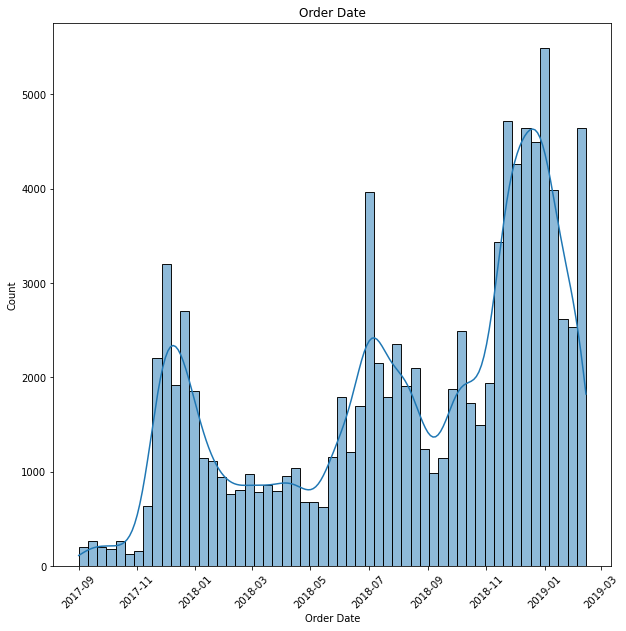

--------------------------------
Analysis For Sale Price
count   99956.000000
mean      446.634719
std       255.982969
min       186.000000
1%        221.000000
5%        240.000000
10%       250.000000
20%       269.000000
30%       285.000000
40%       325.000000
50%       370.000000
60%       400.000000
70%       478.000000
80%       594.000000
90%       750.000000
95%       894.000000
99%      1500.000000
max      4050.000000
Name: Sale Price, dtype: float64


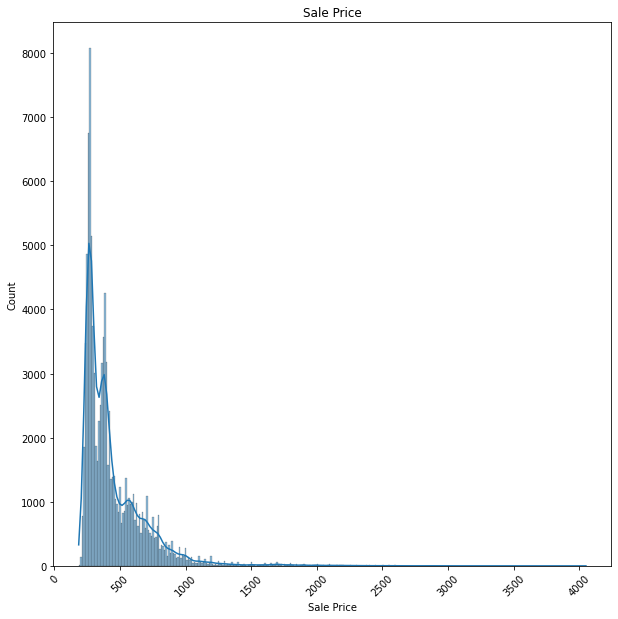

--------------------------------
Analysis For Release Date
count                   99956
unique                     35
top       2018-06-30 00:00:00
freq                    11423
first     2015-06-27 00:00:00
last      2019-02-07 00:00:00
Name: Release Date, dtype: object


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


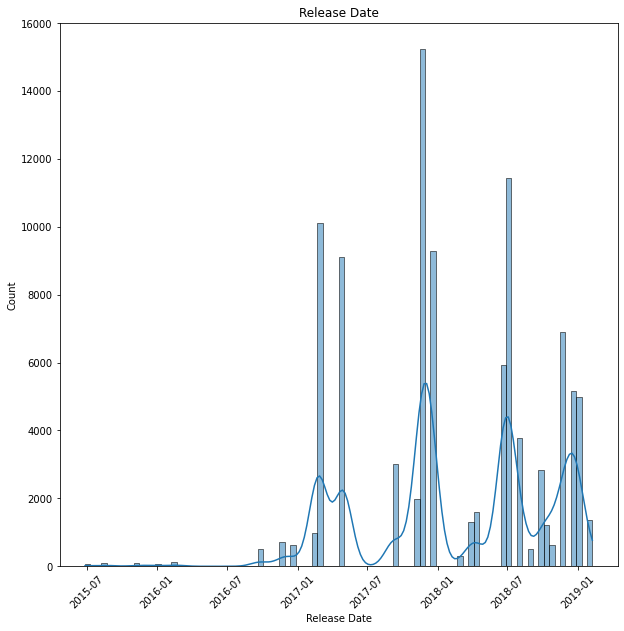

--------------------------------
Analysis For Shoe Size
count   99956.000000
mean        9.344181
std         2.329588
min         3.500000
1%          4.000000
5%          5.000000
10%         6.000000
20%         7.500000
30%         8.500000
40%         9.000000
50%         9.500000
60%        10.000000
70%        10.500000
80%        11.000000
90%        12.000000
95%        13.000000
99%        14.000000
max        17.000000
Name: Shoe Size, dtype: float64


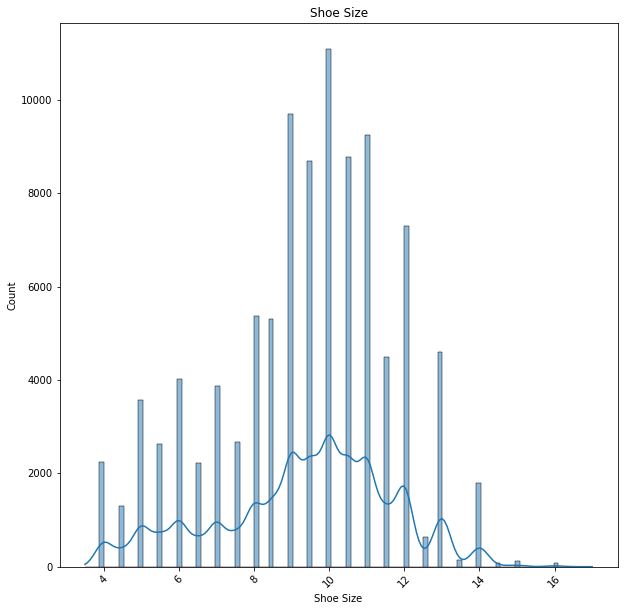

--------------------------------


In [10]:
for col in num_col:
    numerical_analysis(df,col,plot=True)

# Categorical Analysis

In [11]:
def categorical_analysis(df,col,plot=False):
    print("Analysis For {}".format(col))
    print(pd.DataFrame({col:df[col].value_counts(),
                       "Ratio":100*df[col].value_counts()/len(df)}))
    
    if plot:
        plt.figure(figsize=(10,10))
        sns.countplot(x=df[col],data=df)
        plt.title(col)
        plt.xticks(rotation=45)
        plt.show(block=True)
        
    print("-----------------------------------")

Analysis For Brand
           Brand     Ratio
 Yeezy     72162 72.193765
Off-White  27794 27.806235


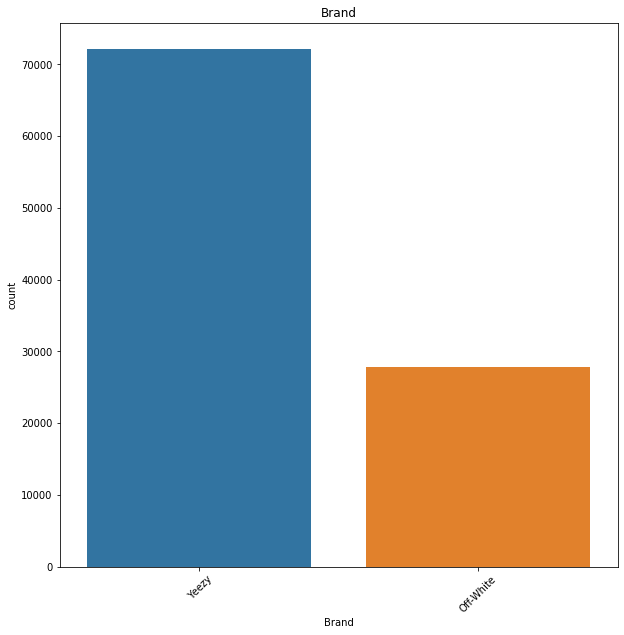

-----------------------------------
Analysis For Retail Price
            Retail Price     Ratio
220.000000         71707 71.738565
190.000000          7095  7.098123
160.000000          6361  6.363800
170.000000          5471  5.473408
130.000000          3622  3.623594
250.000000          3429  3.430509
200.000000          2240  2.240986
150.000000            31  0.031014


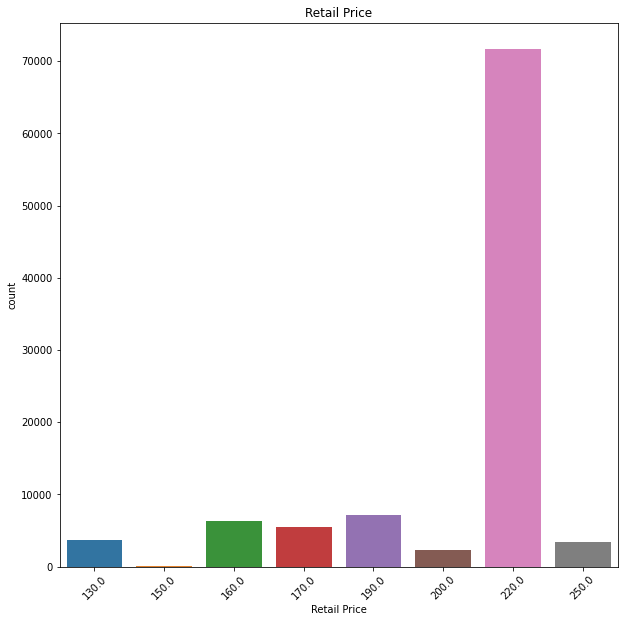

-----------------------------------


In [12]:
for col in cat_col:
    categorical_analysis(df,col,plot=True)

# Outlier Values

In [13]:
qu1=0.1
qu3 = 0.9

### I detected quantiles values  according to numerical analysis.

In [14]:
def outlier_thresholds(df,col,qu1=0.25,qu3=0.75):
    q1 = df[col].quantile(qu1)
    q3 = df[col].quantile(qu3)
    
    ıqr = q3 - q1
    
    low = q1 - 1.5*ıqr
    up = q3 + 1.5*ıqr
    
    return low,up

In [15]:
def outlier_check(df,col,qu1=0.25,qu3=0.75):
    low,up = outlier_thresholds(df,col,qu1,qu3)
    
    if df[(df[col] < low) | (df[col] > up)].any(axis= None):
        return True
    else:
        return False

In [16]:
for col in num_col:
    print(col,outlier_check(df,col,qu1,qu3),outlier_thresholds(df,col,qu1,qu3))

Order Date False (Timestamp('2016-05-02 12:00:00'), Timestamp('2020-08-29 12:00:00'))
Sale Price True (-500.0, 1500.0)
Release Date False (Timestamp('2014-06-08 00:00:00'), Timestamp('2021-09-07 00:00:00'))
Shoe Size False (-3.0, 21.0)


In [17]:
def number_of_outlier_values(df,col,qu1=0.25,qu3=0.75):
    low,up = outlier_thresholds(df,col,qu1,qu3)
    number = len(df[(df[col]<low) | (df[col]>up)])
    if (number>0):
        print(col,": ",number)

In [18]:
print("Number Of Outlier Values")
for col in num_col:
    number_of_outlier_values(df,col,qu1,qu3)

Number Of Outlier Values
Sale Price :  966


### Sale Price is target value so we can't any operations

# NAN VALUES

In [19]:
df.isnull().sum()

Order Date      0
Brand           0
Sneaker Name    0
Sale Price      0
Retail Price    0
Release Date    0
Shoe Size       0
Buyer Region    0
dtype: int64

### We haven`t any nan values

In [20]:
df["Brand"].unique()

array([' Yeezy', 'Off-White'], dtype=object)

# Feature Extraction And Feature Interaction

In [21]:
#Create new feature
df["Price Ratio"] = df["Sale Price"] / df["Retail Price"]

df["Boost"] = df["Sneaker Name"].apply(lambda x: 1 if "Boost" in x.split("-") else 0)
df["Jordan"] = df["Sneaker Name"].apply(lambda x: 1 if "Jordan" in x.split("-") else 0)
df["V2"] = df["Sneaker Name"].apply(lambda x: 1 if "V2" in x.split("-") else 0)
df["Core"] = df["Sneaker Name"].apply(lambda x: 1 if "Core" in x.split("-") else 0)
df["Low"] = df["Sneaker Name"].apply(lambda x: 1 if "Low" in x.split("-") else 0)
df["350"] = df["Sneaker Name"].apply(lambda x: 1 if "350" in x.split("-") else 0)
df["Adidas"] = df["Sneaker Name"].apply(lambda x: 1 if "Adidas" or "adidas" in x.split("-") else 0)
df["Nike"] = df["Sneaker Name"].apply(lambda x: 1 if "Nike" in x.split("-") else 0)
df["Air"] = df["Sneaker Name"].apply(lambda x: 1 if "Air" in x.split("-") else 0)
df["Zoom"] = df["Sneaker Name"].apply(lambda x: 1 if "Zoom" in x.split("-") else 0)
df["Blazer"] = df["Sneaker Name"].apply(lambda x: 1 if "Blazer" in x.split("-") else 0)
df["Retro"] = df["Sneaker Name"].apply(lambda x: 1 if "Retro" in x.split("-") else 0)
df["Force"] = df["Sneaker Name"].apply(lambda x: 1 if "Force" in x.split("-") else 0)
df["Max"] = df["Sneaker Name"].apply(lambda x: 1 if "Max" in x.split("-") else 0)
df["Black"] = df["Sneaker Name"].apply(lambda x: 1 if "Black" in x.split("-") else 0)
df["Vapormax"] = df["Sneaker Name"].apply(lambda x: 1 if "Vapormax" in x.split("-") else 0)

df["date_diff"] = df['Order Date'].sub(df['Release Date'], axis=0)/np.timedelta64('1','D')
df.drop("Order Date",axis=1,inplace=True)
df.drop("Release Date",axis=1,inplace=True)

unique_region = list(df["Buyer Region"].unique())

for region in unique_region:
    df[region] = df["Buyer Region"].apply(lambda x:1 if x == region else 0)
df.drop("Buyer Region",axis=1,inplace=True)

In [22]:
df.head()

,Brand,Sneaker Name,Sale Price,Retail Price,Shoe Size,Price Ratio,Boost,Jordan,V2,Core,Low,350,Adidas,Nike,Air,Zoom,Blazer,Retro,Force,Max,Black,Vapormax,date_diff,California,Kentucky,...,South Carolina,Maine,Illinois,Nevada,Maryland,Arizona,Minnesota,Iowa,Tennessee,West Virginia,Indiana,Arkansas,Alaska,Wyoming,Utah,New Hampshire,Vermont,District of Columbia,Hawaii,New Mexico,South Dakota,Mississippi,North Dakota,Idaho,Montana
0,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.000000,220.000000,11.000000,4.986364,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,342.000000,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.000000,220.000000,11.000000,3.113636,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,282.000000,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.000000,220.000000,11.000000,3.136364,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,282.000000,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.000000,220.000000,11.500000,4.886364,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,282.000000,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.000000,220.000000,11.000000,3.763636,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,202.000000,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
DataFrame_Check(df)

########### HEAD ###########
    Brand                                   Sneaker Name  Sale Price  \
0   Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga 1097.000000   
1   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper  685.000000   
2   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green  690.000000   
3   Yeezy       Adidas-Yeezy-Boost-350-V2-Core-Black-Red 1075.000000   
4   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017  828.000000   

   Retail Price  Shoe Size  Price Ratio  Boost  Jordan  V2  Core  Low  350  \
0    220.000000  11.000000     4.986364      1       0   1     0    1    1   
1    220.000000  11.000000     3.113636      1       0   1     1    0    1   
2    220.000000  11.000000     3.136364      1       0   1     1    0    1   
3    220.000000  11.500000     4.886364      1       0   1     1    0    1   
4    220.000000  11.000000     3.763636      1       0   1     1    0    1   

   Adidas  Nike  Air  Zoom  Blazer  Retro  Force  Max  Black  Vaporma

# Encoding

### LABEL ENCODİNG

In [24]:
def label_encoding(df,col):
    label = LabelEncoder()
    df[col] = label.fit_transform(df[col])
    return df

In [25]:
binary_columns = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
for col in binary_columns:
    df = label_encoding(df,col)

### ONE HOT ENCODİNG

In [26]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [27]:
cat_col,num_col,car_col = grab_columns(df)

----- Categorical Columns -----
['Brand', 'Retail Price', 'Boost', 'Jordan', 'V2', 'Core', 'Low', '350', 'Adidas', 'Nike', 'Air', 'Zoom', 'Blazer', 'Retro', 'Force', 'Max', 'Black', 'Vapormax', 'California', 'Kentucky', 'Rhode Island', 'Michigan', 'New York', 'Kansas', 'Florida', 'New Jersey', 'Texas', 'North Carolina', 'Oregon', 'Alabama', 'Delaware', 'Virginia', 'Wisconsin', 'Colorado', 'Massachusetts', 'Pennsylvania', 'Louisiana', 'Washington', 'Georgia', 'Ohio', 'Nebraska', 'Oklahoma', 'Connecticut', 'Missouri', 'South Carolina', 'Maine', 'Illinois', 'Nevada', 'Maryland', 'Arizona', 'Minnesota', 'Iowa', 'Tennessee', 'West Virginia', 'Indiana', 'Arkansas', 'Alaska', 'Wyoming', 'Utah', 'New Hampshire', 'Vermont', 'District of Columbia', 'Hawaii', 'New Mexico', 'South Dakota', 'Mississippi', 'North Dakota', 'Idaho', 'Montana']
----- Numerical Columns -----
['Sale Price', 'Shoe Size', 'Price Ratio', 'date_diff']
----- Cardinal Columns -----
['Sneaker Name']


In [28]:
one_hot_columns = [col for col in cat_col if col not in binary_columns and col != "Sale Price"]
df = one_hot_encoder(df,one_hot_columns,drop_first=True)

# Scaling

In [29]:
scaler = MinMaxScaler()
num_col = [col for col in num_col if col != "Sale Price"]

df[num_col] = scaler.fit_transform(df[num_col])

In [30]:
df.head()

,Brand,Sneaker Name,Sale Price,Shoe Size,Price Ratio,date_diff,Retail Price_150.0,Retail Price_160.0,Retail Price_170.0,Retail Price_190.0,Retail Price_200.0,Retail Price_220.0,Retail Price_250.0,Boost_1,Jordan_1,V2_1,Core_1,Low_1,350_1,Nike_1,Air_1,Zoom_1,Blazer_1,Retro_1,Force_1,...,South Carolina_1,Maine_1,Illinois_1,Nevada_1,Maryland_1,Arizona_1,Minnesota_1,Iowa_1,Tennessee_1,West Virginia_1,Indiana_1,Arkansas_1,Alaska_1,Wyoming_1,Utah_1,New Hampshire_1,Vermont_1,District of Columbia_1,Hawaii_1,New Mexico_1,South Dakota_1,Mississippi_1,North Dakota_1,Idaho_1,Montana_1
0,0,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.000000,0.555556,0.202288,0.295683,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.000000,0.555556,0.110803,0.252518,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.000000,0.555556,0.111914,0.252518,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.000000,0.592593,0.197403,0.252518,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.000000,0.555556,0.142557,0.194964,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Model

In [31]:
X = df.drop(["Sale Price","Sneaker Name"],axis=1)
y = df["Sale Price"]

In [32]:
X

,Brand,Shoe Size,Price Ratio,date_diff,Retail Price_150.0,Retail Price_160.0,Retail Price_170.0,Retail Price_190.0,Retail Price_200.0,Retail Price_220.0,Retail Price_250.0,Boost_1,Jordan_1,V2_1,Core_1,Low_1,350_1,Nike_1,Air_1,Zoom_1,Blazer_1,Retro_1,Force_1,Max_1,Black_1,...,South Carolina_1,Maine_1,Illinois_1,Nevada_1,Maryland_1,Arizona_1,Minnesota_1,Iowa_1,Tennessee_1,West Virginia_1,Indiana_1,Arkansas_1,Alaska_1,Wyoming_1,Utah_1,New Hampshire_1,Vermont_1,District of Columbia_1,Hawaii_1,New Mexico_1,South Dakota_1,Mississippi_1,North Dakota_1,Idaho_1,Montana_1
0,0,0.555556,0.202288,0.295683,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.555556,0.110803,0.252518,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.555556,0.111914,0.252518,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.592593,0.197403,0.252518,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.555556,0.142557,0.194964,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,0,0.333333,0.084157,0.084892,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99952,0,0.370370,0.091485,0.084892,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99953,0,0.148148,0.093039,0.084892,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99954,0,0.555556,0.103032,0.084892,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
y

0       1097.000000
1        685.000000
2        690.000000
3       1075.000000
4        828.000000
            ...    
99951    565.000000
99952    598.000000
99953    605.000000
99954    650.000000
99955    640.000000
Name: Sale Price, Length: 99956, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=34,test_size=0.3)

### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression().fit(X_train,y_train)
print(lin_model.score(X_train,y_train))

0.9935889860627706


In [36]:
model_predict = lin_model.predict(X_test)

In [37]:
mean_squared_error(y_test,model_predict)

438.2683391888438

In [38]:
result = pd.DataFrame({"Real Y":y_test,
                      "Predict Y":model_predict})

In [39]:
result

,Real Y,Predict Y
62890,490.000000,438.878906
50970,251.000000,258.861328
1363,1000.000000,910.935547
36271,432.000000,414.705078
64441,268.000000,281.544922
...,...,...
15249,327.000000,330.451172
18044,892.000000,877.314453
44219,1050.000000,1049.197266
32932,300.000000,308.943359


### LightGBM

In [40]:
from lightgbm import LGBMRegressor
light_model = LGBMRegressor().fit(X_train,y_train)
print(light_model.score(X_train,y_train))

0.9984708628610386


In [41]:
light_model_predict = light_model.predict(X_test)

In [42]:
mean_squared_error(y_test,light_model_predict)

131.35656402287333

In [43]:
light_result = pd.DataFrame({"Real Y":y_test,
                            "Predict Y":light_model_predict})

In [44]:
light_result

,Real Y,Predict Y
62890,490.000000,489.243018
50970,251.000000,251.002271
1363,1000.000000,996.553325
36271,432.000000,431.078493
64441,268.000000,266.354698
...,...,...
15249,327.000000,326.526644
18044,892.000000,890.909959
44219,1050.000000,1049.802128
32932,300.000000,300.814284


### Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
gradboost_model = GradientBoostingRegressor().fit(X_train,y_train)
print(gradboost_model.score(X_train,y_train))

0.9986831587158004


In [46]:
gr_predict = gradboost_model.predict(X_test)

In [47]:
mean_squared_error(y_test,gr_predict)

92.90715337221958

In [48]:
gb_result = pd.DataFrame({"Real Y":y_test,
                         "Predict Y":gr_predict})

In [49]:
gb_result

,Real Y,Predict Y
62890,490.000000,499.893799
50970,251.000000,253.192932
1363,1000.000000,950.455186
36271,432.000000,432.253483
64441,268.000000,269.487741
...,...,...
15249,327.000000,329.197910
18044,892.000000,880.186857
44219,1050.000000,1055.509615
32932,300.000000,300.572373


# Model Improvement

In [50]:
from sklearn.model_selection import GridSearchCV

### LightGBM Improvement

In [51]:
lightgbm_parameters = {"boosting_type":["dart","goss"],
                      "num_leaves":range(20,25),
                      "learning_rate":[0.1,0.15],
                      "random_state":[16],
                      "min_child_samples":range(15,20)}

In [52]:
lgbm_grid = GridSearchCV(light_model,lightgbm_parameters,cv=5,n_jobs=-1,verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [53]:
print(lgbm_grid.best_params_)

{'boosting_type': 'goss', 'learning_rate': 0.15, 'min_child_samples': 15, 'num_leaves': 23, 'random_state': 16}


In [54]:
lgbm_final_model = light_model.set_params(**lgbm_grid.best_params_)
lgbm_final_model = lgbm_final_model.fit(X_train,y_train)
print(lgbm_final_model.score(X_train,y_train))

0.9987512138559288


In [55]:
lgbm_grid_predict = lgbm_final_model.predict(X_test)

In [56]:
mean_squared_error(y_test,lgbm_grid_predict)

143.82070428515206

In [57]:
light_result["Grid Predict"] = lgbm_grid_predict

In [58]:
light_result

,Real Y,Predict Y,Grid Predict
62890,490.000000,489.243018,486.101162
50970,251.000000,251.002271,250.362489
1363,1000.000000,996.553325,987.215904
36271,432.000000,431.078493,431.734382
64441,268.000000,266.354698,267.549291
...,...,...,...
15249,327.000000,326.526644,328.163724
18044,892.000000,890.909959,885.451687
44219,1050.000000,1049.802128,1051.451343
32932,300.000000,300.814284,300.456846


### Gradient Boosting Improvement

In [59]:
grad_boost_parameters = {"learning_rate":[0.05,0.1,0.15],
                        "n_estimators":range(90,95),
                        "subsample":[0.1,0.3,0.5],
                        "min_samples_split":range(2,6),
                        "max_features":["sqrt","log2"]
                        }

In [60]:
grBoost_grid = GridSearchCV(gradboost_model,grad_boost_parameters,cv=5,n_jobs=-1,verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


In [61]:
print(grBoost_grid.best_params_)

{'learning_rate': 0.15, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 90, 'subsample': 0.5}


In [62]:
gradBoost_final_model = gradboost_model.set_params(**grBoost_grid.best_params_)
gradBoost_final_model = gradBoost_final_model.fit(X_train,y_train)
print(gradBoost_final_model.score(X_train,y_train))

0.968676573045851


In [63]:
gradboost_final_predict = gradBoost_final_model.predict(X_test)

In [64]:
mean_squared_error(y_test,gradboost_final_predict)

2129.098889098129

In [65]:
gb_result["Grid Predict"] = gradboost_final_predict

In [66]:
gb_result

,Real Y,Predict Y,Grid Predict
62890,490.000000,499.893799,534.537499
50970,251.000000,253.192932,253.422146
1363,1000.000000,950.455186,707.304806
36271,432.000000,432.253483,420.278112
64441,268.000000,269.487741,283.877468
...,...,...,...
15249,327.000000,329.197910,340.947641
18044,892.000000,880.186857,845.816465
44219,1050.000000,1055.509615,990.803711
32932,300.000000,300.572373,312.232785
